In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
print('nNumber of rows and columns in the data set: ',{'Rows':df.shape[0], 'columns':df.shape[1]})

nNumber of rows and columns in the data set:  {'Rows': 1338, 'columns': 7}


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
duplicate=df.duplicated()
print(duplicate.sum())

1


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
dp1=df.duplicated()
print(dp1.sum())

0


In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

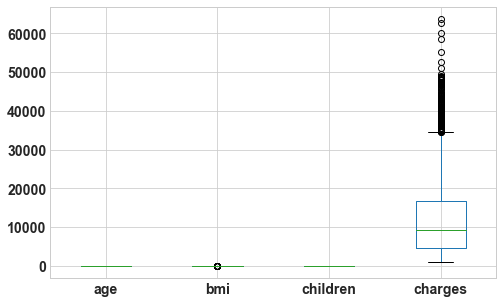

In [16]:
df.boxplot();

In [17]:
print("No of elements in the dataframe is",df.size)

No of elements in the dataframe is 9359


In [18]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [28]:
num_cols=[col for col in df.columns if df[col].dtypes!='O']
num_cols

['age', 'bmi', 'children', 'charges']

In [29]:
cat_cols=[col for col in df.columns if df[col].dtypes=='O']
cat_cols

['sex', 'smoker', 'region']

In [30]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


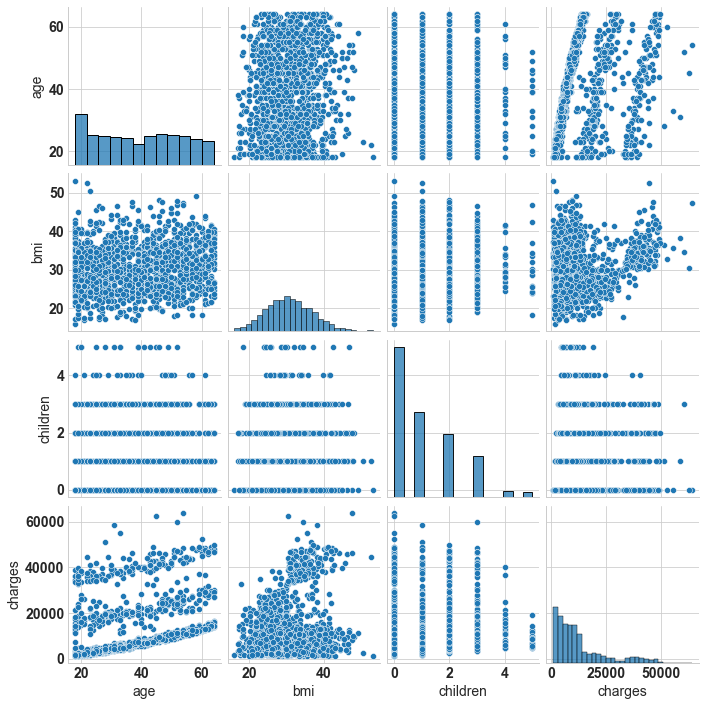

In [19]:
sns.pairplot(df);

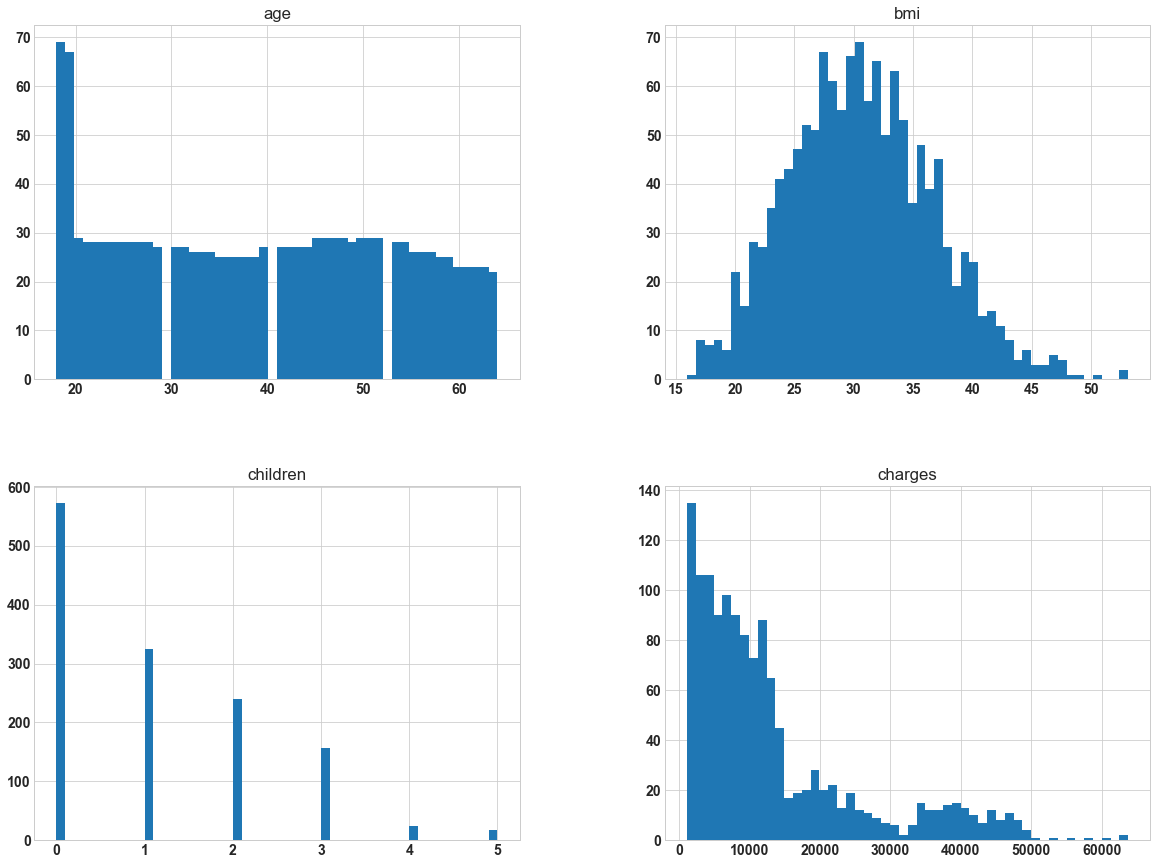

In [20]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15));

In [23]:
corr_mat=df.corr()
corr_mat

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [24]:
corr_mat['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

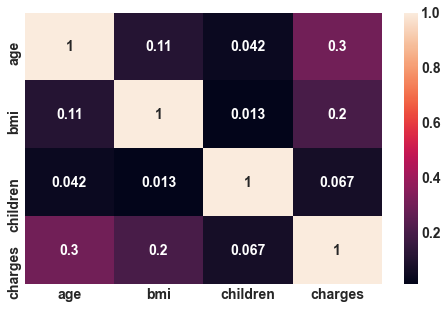

In [25]:
sns.heatmap(df.corr(),annot= True);

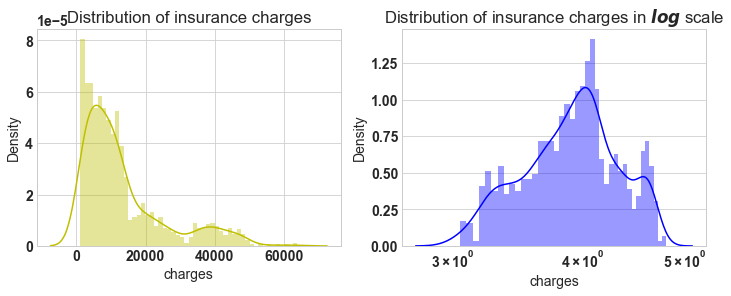

In [26]:
import warnings
warnings.filterwarnings('ignore')
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='y',ax=ax)
ax.set_title('Distribution of insurance charges')
ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log');

In [31]:
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_', columns = cat_cols, drop_first =True, dtype='int8')

In [32]:
print('Columns in original data frame:n',df.columns.values)
print('nNumber of rows and columns in the dataset:',df.shape)
print('nColumns in data frame after encoding dummy variable:n',df_encode.columns.values)
print('nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:n ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']
nNumber of rows and columns in the dataset: (1337, 7)
nColumns in data frame after encoding dummy variable:n ['age' 'bmi' 'children' 'charges' 'OHE_male' 'OHE_yes' 'OHE_northwest'
 'OHE_southeast' 'OHE_southwest']
nNumber of rows and columns in the dataset: (1337, 9)


In [33]:
from sklearn.model_selection import train_test_split
# Independent variables(predictor)
X = df_encode.drop('charges',axis=1)
# dependent variable(response)
y = df_encode['charges'] 
# Now, split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [34]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True,normalize=False)
lin_reg.fit(X_train,y_train)
#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-11730.850944,-11730.850944
1,theta_1,age,248.971077,248.971077
2,theta_2,bmi,345.537712,345.537712
3,theta_3,children,414.894403,414.894403
4,theta_4,OHE_male,-128.945691,-128.945691
5,theta_5,OHE_yes,24104.748205,24104.748205
6,theta_6,OHE_northwest,-287.971199,-287.971199
7,theta_7,OHE_southeast,-1114.181990,-1114.181990
8,theta_8,OHE_southwest,-1449.323836,-1449.323836


In [36]:
y_pred_norm =  np.matmul(X_test_0,theta)
#Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]
# R_square calculation
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)

In [37]:
y_pred_sk = lin_reg.predict(X_test)
#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
# R_square
R_square_sk = lin_reg.score(X_test,y_test)

In [38]:
print(y_pred_norm)

[ 1.35211460e+04  8.36922917e+03  3.13739442e+04  6.04283350e+02
  1.20921802e+04  2.75840892e+04  8.80430339e+03  8.53472555e+03
  1.26672492e+04  3.93505307e+04  1.58530783e+03  1.47095570e+04
  1.10505226e+04  1.27263545e+04  9.99203350e+03 -1.42603938e+03
  5.02936198e+03  3.59669617e+03  3.53374200e+04  3.29910044e+04
  3.89527914e+04  3.51377762e+04  5.28987610e+03  9.96769802e+03
  1.64885547e+03  7.82918373e+03  5.46388116e+03  2.94567770e+04
  3.75344327e+02  9.98555439e+01  8.35876660e+03  1.11451838e+04
  4.07408386e+03  1.20899166e+04  1.61787878e+04  2.91493521e+04
  9.52159333e+03  2.67955056e+04  9.89513888e+03  4.50515160e+03
  1.10441042e+04  1.34201746e+04  7.64099118e+03  3.19015535e+04
  6.89641319e+03  1.35809842e+04  4.11615076e+03  2.46950753e+03
  3.08309377e+04  5.18196428e+03  1.62595490e+04  8.74037178e+03
  1.77761725e+03  1.44486219e+04  6.25486602e+03  3.21271846e+04
  1.45584296e+04  9.86216773e+03  2.73761987e+04  2.81874977e+03
  2.99032059e+04  8.69153

In [39]:
print(y_pred_sk)

[ 1.35211460e+04  8.36922917e+03  3.13739442e+04  6.04283350e+02
  1.20921802e+04  2.75840892e+04  8.80430339e+03  8.53472555e+03
  1.26672492e+04  3.93505307e+04  1.58530783e+03  1.47095570e+04
  1.10505226e+04  1.27263545e+04  9.99203350e+03 -1.42603938e+03
  5.02936198e+03  3.59669617e+03  3.53374200e+04  3.29910044e+04
  3.89527914e+04  3.51377762e+04  5.28987610e+03  9.96769802e+03
  1.64885547e+03  7.82918373e+03  5.46388116e+03  2.94567770e+04
  3.75344327e+02  9.98555439e+01  8.35876660e+03  1.11451838e+04
  4.07408386e+03  1.20899166e+04  1.61787878e+04  2.91493521e+04
  9.52159333e+03  2.67955056e+04  9.89513888e+03  4.50515160e+03
  1.10441042e+04  1.34201746e+04  7.64099118e+03  3.19015535e+04
  6.89641319e+03  1.35809842e+04  4.11615076e+03  2.46950753e+03
  3.08309377e+04  5.18196428e+03  1.62595490e+04  8.74037178e+03
  1.77761725e+03  1.44486219e+04  6.25486602e+03  3.21271846e+04
  1.45584296e+04  9.86216773e+03  2.73761987e+04  2.81874977e+03
  2.99032059e+04  8.69153

In [40]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  37184786.96922601


In [41]:
print('The R_2 score by using the normal equation is: ',R_square)

The R_2 score by using the normal equation is:  0.7425786630860698


In [42]:
print('The R_2 score by using the sklearn library is: ',R_square_sk)

The R_2 score by using the sklearn library is:  0.7425786630860698


Text(0.5, 1.0, 'Check for Linearity:n Actual Vs Predicted value')

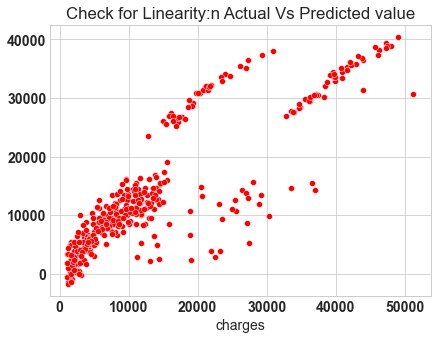

In [47]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:n Actual Vs Predicted value')

In [44]:
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: n Residual eror');

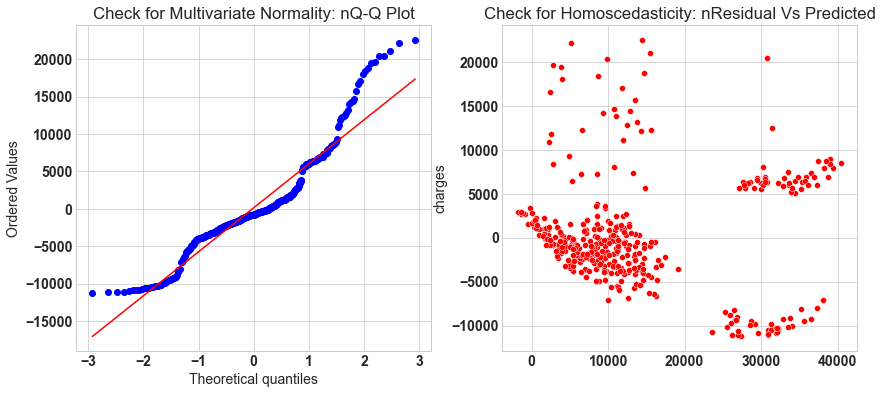

In [45]:
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: nQ-Q Plot')
#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: nResidual Vs Predicted');

In [46]:
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

3.884681868210302